# PLA with error plots

In this Jupyter Notebook, we will take a brief look at the error trend when the Perceptron LA is in its training phase

## Initial setup

The initial setup is very similar to the previous notebooks. For a better explanation of the initial setup, you can see the [PLA-basic.ipynb](PLA-basic.ipynb) where every line is properly commented and a better mathematical explanation is given.


[1. 1. 1.]


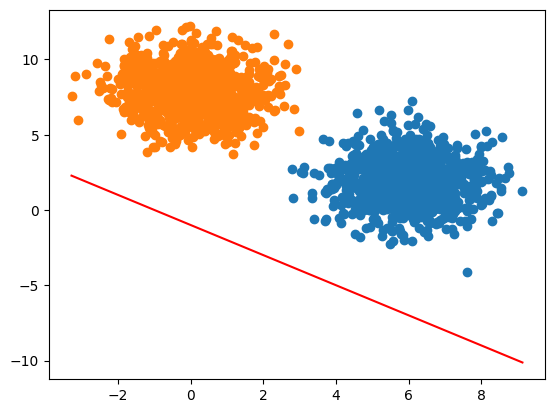

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# pseudo-random number generator
np.random.seed(314)

# generate 1000 points per class
N = 1000

# generates first and second feature of class 1
X1_1 = np.random.normal(loc = 6, scale = 1, size = N)

X1_2 = np.random.normal(loc = 2, scale = 1.5, size=N)

# labels of the points for class 1
y1 = np.ones(N)


# generates first and second feature of class 2
X2_1 = np.random.normal(loc = 0, scale = 1, size = N)

X2_2 = np.random.normal(loc = 8, scale = 1.5, size = N)

# labels of the points for class 2
y2 = - np.ones(N)

# plots the sets of points
plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)


# generates w = [w0, ..., wn]
w = np.random.uniform(low = 1, size = 3)
print(w)

# plots the initial setup
plt.plot([np.min(X2_1), np.max(X1_1)], # defines coordinates of the line
         [np.min(X2_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1_1) * (-w[1]/w[2]) - w[0]/w[2]], # defines y = mx + q
         color='red')

# bias feature
X0 = np.ones(N * 2)

# features of the dataset
X1 = np.concatenate((X1_1, X2_1))
X2 = np.concatenate((X1_2, X2_2))

# feature matrix
X = np.stack((X0, X1, X2), axis=1)

# labels
y = np.concatenate((y1, y2))

### Error function

To keep track of the errors that occurred during the training phase an error function shall be defined. The error function takes as input the $X$ matrix, containing all the data points, the $y$ vector, containing the correct labels and the $w$ vector containing the weight for every feature (see [dataset guide](../dataset-guide.ipynb)).

We define the error function as follws:
$$
    \frac{1}{2}\sum_1^N (y - X\cdot w)
$$

In [2]:
def sum_distance_error(X, y, w):
    error = np.sum(np.square(y - np.dot(X, w))) / 2
    return error

print(f"Current amount of errors:  {sum_distance_error(X, y, w):.3f}")

Current amount of errors:  85236.430


## Training script

After defining the usual variables <tt>max_epochs</tt>, <tt>current_epoch</tt> and <tt>eta</tt>, we define two vectors that will contain the distance error per epoch (<tt>distance_error_epoch</tt>) and the number of misclassified object per epoch (<tt>errors_epoch</tt>).

In [3]:
# max number of iterations
max_epochs = 100
current_epoch = 0

# learning rate
eta = 1e-3

# distance errors
distance_error_epoch = np.zeros(max_epochs)

# misclassification errors
errors_epoch = np.zeros(max_epochs)

The training part is exactly the same as in the [PLA-basic.ipynb](PLA-basic.ipynb) notebook. The only thing that changes is the computation of the two errors.

In [4]:
while (current_epoch < max_epochs):
    
    # compute distance error
    distance_error_epoch[current_epoch] = sum_distance_error(X, y, w)
        
    for i in range(y.size):
        
        output = np.sign(np.dot(X[i, :], w))
        
        # if object is misclassified
        if ((output * y[i]) < 0):
            
            # update rule
            w = w + eta * (X[i, :] * y[i])

            # increase discalssified objects
            errors_epoch[current_epoch] += 1
    
    current_epoch += 1

We can now print the solution found by the Perceptron.

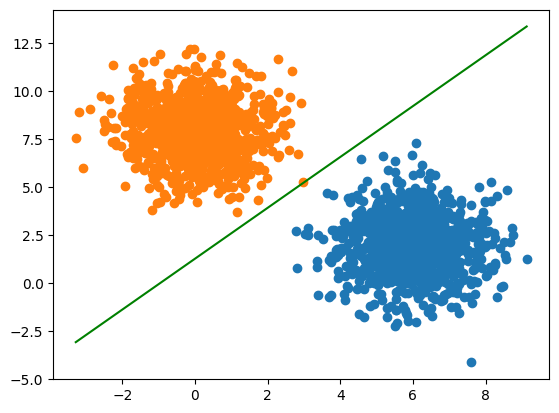

In [5]:
# plot the points
plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)

# plot the line
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')

### Error plots

By observing the two plots we can say that the model training has been successful: the distance is minimal and the number of misclassified objects is zero.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


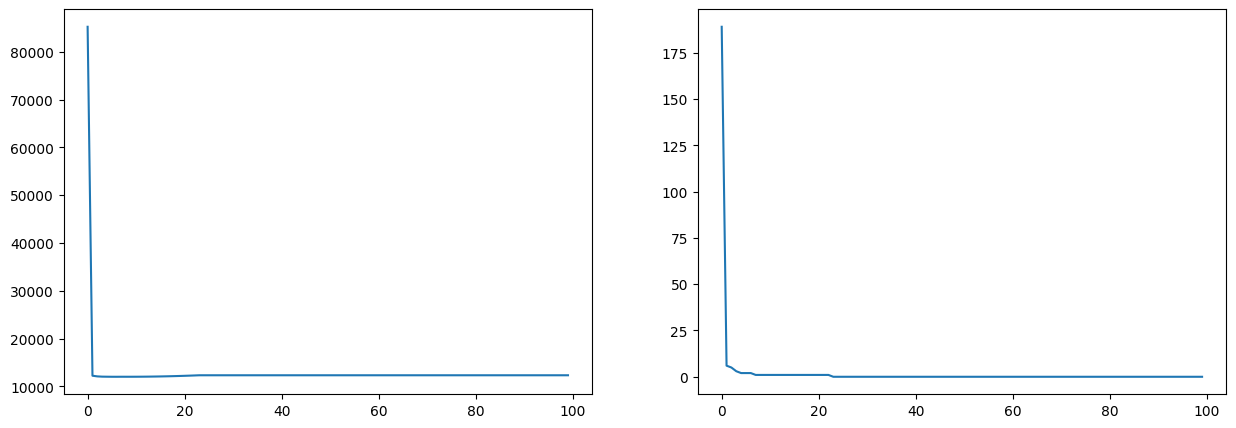

In [6]:
print(errors_epoch[-10:])

# creates two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# value of distance errors for each epoch
axs[0].plot(range(sum(distance_error_epoch > 0)), distance_error_epoch[distance_error_epoch > 0])

# number of misclassified objects for each epoch
axs[1].plot(range(sum(distance_error_epoch > 0)), errors_epoch[distance_error_epoch > 0])